# 第四章:多层感知机

multilayer preceptron,MLP 多层感知机. 最简单的深度神经网络  
就是多层神经元组合.

## 4.1 多层感知机

### 4.1.1 隐藏层

线性模型过于理想化,可能会不适用-->加入隐藏层-->实现非线性  
*(全连接层参数可能太多,需要权衡参数节省和模型有效性)*

加入隐藏层后的输出$\mathbf{O} \in \mathbb{R}^{n \times q}$:$$\begin{split}\begin{aligned}
    \mathbf{H} & = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}, \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.
\end{aligned}\end{split}$$
但是只是简单加隐藏层并没有用,可以证明这与之前的线性模型等价:$$\mathbf{O} = (\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})\mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W}^{(1)}\mathbf{W}^{(2)} + \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W} + \mathbf{b}.$$

所以我们需要给隐藏层输出施加一个激活函数$\sigma$.激活函数的输出称为激活值.  
$$\begin{split}\begin{aligned}
    \mathbf{H} & = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.\\
\end{aligned}\end{split}$$
这样就不会退化为线性

应用于隐藏层的**激活函数**通常不仅**按行**操作，也**按元素**操作。这意味着在计算每一层的线性部分之后，我们可以计算每个活性值，而不需要查看其他隐藏单元所取的值

- 通用近似定理: 理论上,即使只有一个隐藏层,也可以对任意函数建模

### 4.1.2 激活函数

通过计算加权和加上偏置来判断神经元是否被激活.

下面介绍一些常见的激活函数

In [5]:
%matplotlib inline
import torch 
from d2l import torch as d2l

#### 1.ReLU函数----最受欢迎的  

修正线性单元(rectified linear unit,ReLU)  
实现简单,表现良好  
$\operatorname{ReLU}(x) = \max(x, 0).$

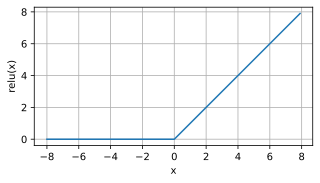

In [6]:
x=torch.arange(-8.0,8.0,0.1,requires_grad=True)
y=torch.relu(x)
d2l.plot(x.detach(),y.detach(),'x','relu(x)',figsize=(5,2.5))

只有在0这个点不可导,我们默认导数为0.当然,实际中几乎不可能为0.  
引用一句古老的谚语，*“如果微妙的边界条件很重要，我们很可能是在研究数学而非工程”*

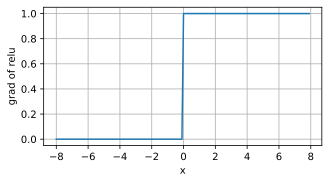

In [7]:
#ReLU的导数
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(),x.grad,'x','grad of relu',figsize=(5,2.5))
#x.grad.data.zero_()  我觉得每次backword之后就清理梯度比较好吧??

<div style="background: #f2cac9; border-left: 5px solid #ed5126; padding: 10px; margin: 10px 0;">
<strong>ATTENTION & CONFUSED</strong><br>
我觉得每次backword之后就清理梯度比较好吧??
</div>

ReLU优点:
- 求导表现好,参数要么消失,要么通过;
- 且可以缓解梯度消失问题

ReLU有许多变体,比如*参数化ReLU* (pReLU),为ReLU添加了一个线性项，因此即使参数是负的，某些信息仍然可以通过：$$\operatorname{pReLU}(x) = \max(0, x) + \alpha \min(0, x).$$

#### 2.Sigmoid函数

亦称挤压函数,将输入压缩到$(0,1)$ $$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}$$
在最早的神经网络中,科学家关注的是激活/不激活的阈值单元.  
如今, 当我们想要将输出视作二元分类问题的概率时，sigmoid仍然被广泛用作输出单元上的激活函数（sigmoid可以视为softmax的特例）

不过在隐层中已较少使用

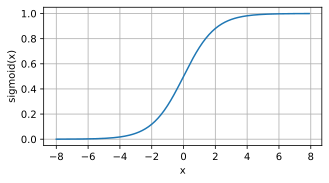

In [8]:
y=torch.sigmoid(x)
d2l.plot(x.detach(),y.detach(),'x','sigmoid(x)',figsize=(5,2.5))

sigmoid求导$$\frac{d}{dx} \operatorname{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \operatorname{sigmoid}(x)\left(1-\operatorname{sigmoid}(x)\right).$$

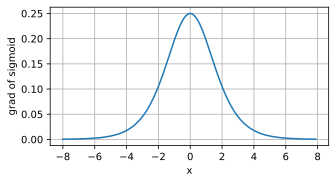

In [9]:
#导数
x.grad.data.zero_()  #清除上一次执行时残留的梯度.如果没有残留则x.grad为None,会报错
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(),x.grad,'x','grad of sigmoid',figsize=(5,2.5))

#### 3.tanh函数

双曲正切函数,将输入压缩到$(-1,1)$ $$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$
形状类似sigmoid,不过tanh关于坐标原点中心对称

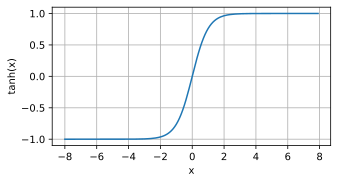

In [56]:
y=torch.tanh(x)
d2l.plot(x.detach(),y.detach(),'x','tanh(x)',figsize=(5,2.5))

导数:$$\frac{d}{dx} \operatorname{tanh}(x) = 1 - \operatorname{tanh}^2(x).$$

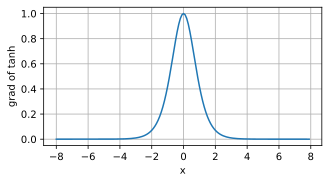

In [57]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(),x.grad,'x','grad of tanh',figsize=(5,2.5))

----
**Practice**
1. pReLU

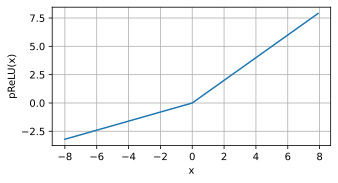

In [58]:
y=torch.prelu(x,torch.tensor(0.4))
d2l.plot(x.detach(),y.detach(),'x','pReLU(x)',figsize=(5,2.5))

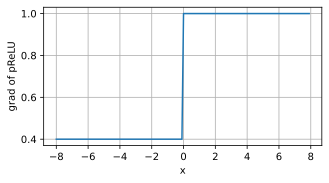

In [59]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(),x.grad,'x','grad of pReLU',figsize=(5,2.5))
#可以看到负数部分等于权重

2. 证明$$\operatorname{tanh}(x) + 1 = 2 \operatorname{sigmoid}(2x)$$

In [42]:
z=torch.tanh(x)+1-2*torch.sigmoid(2*x)
(abs(z)>1e-05).sum()

tensor(0)

----

## 4.2 多层感知机的从0开始实现

继续使用前面的Fashion-MNIST图像分类数据集

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [9]:
batch_size=256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)

### 4.2.1初始化模型参数

继续忽略像素的空间结构.

我们可将**层数**和**隐藏单元数(隐层神经元数/层宽度)** 都视为超参数。通常，我们选择2的若干次幂作为层的宽度。因为内存在硬件中的分配和寻址方式，这么做往往可以在计算上更高效。

我们这里先实现一个单隐层的,选择256个隐层单元  
我们用几个张量来表示参数

In [10]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256  

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
#input-->hidden

W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))
#hidden-->output

params = [W1, b1, W2, b2]


### 4.2.2激活函数

In [11]:
#手动实现ReLU
def relu(X):
    a=torch.zeros_like(X)
    return torch.max(a,X)

### 4.2.3 模型

忽略空间结构,所以调用`reshape`将二维图形转换为长度为`num_inputs=784`的向量

In [12]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)
    return (H@W2 + b2)

### 4.2.4 损失函数

前面已经讨论过了,所以这里我们直接调用API中的内置函数

In [13]:
loss=nn.CrossEntropyLoss(reduction='none')

```python
>>>type(loss)
torch.nn.modules.loss.CrossEntropyLoss
```

### 4.2.5 训练

与softmax训练过程完全相同,可以直接用前面写的

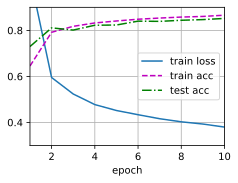

In [14]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

<div style="background: #f2cac9; border-left: 5px solid #ed5126; padding: 10px; margin: 10px 0;">
<strong>ATTENTION</strong><br>
有点遗忘/不懂,后面实践的时候再说
</div>

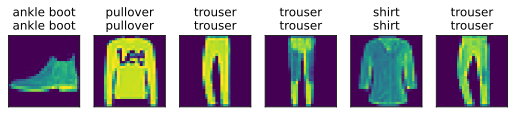

In [16]:
#验证一下
def predict_ch3(net, test_iter, n=6):  #@ not save
    """预测标签（定义见第3章）"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)


## 4.3 多层感知机的简洁实现

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

与softmax相比,区别在与我们多了两个层,一个隐层和一个激活函数层.

[关于生成器](./补充--生成器.ipynb)

In [159]:
# 创建固定种子的生成器
generator = torch.Generator()
generator.manual_seed(42)  # 设置种子为 42

# 使用这个生成器
w = torch.empty(3, 5)
print(torch.nn.init.normal_(w, generator=generator))

# 直接再次使用相同的生成器不会产生相同的随机数
w2 = torch.empty(3, 5)
print(torch.nn.init.normal_(w2, generator=generator))

print(torch.allclose(w, w2))  # 输出：False（生成器状态已改变）

#-----------#
# 创建固定种子的生成器
generator = torch.Generator()
generator.manual_seed(42)  # 设置种子为 42
# 使用这个生成器
w = torch.empty(3, 5)
print(torch.nn.init.normal_(w, generator=generator))

# 再次设置相同的生成器
generator = torch.Generator()
generator.manual_seed(42)  # 设置种子为 42
#再次使用,产生相同的随机数
w2 = torch.empty(3, 5)
print(torch.nn.init.normal_(w2, generator=generator))

print(torch.allclose(w, w2))  # 输出：True（生成器状态未改变）



tensor([[ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229],
        [-0.1863,  2.2082, -0.6380,  0.4617,  0.2674],
        [ 0.5349,  0.8094,  1.1103, -1.6898, -0.9890]])
tensor([[ 0.9580,  1.3221,  0.8172, -0.7658, -0.7506],
        [ 1.3525,  0.6863, -0.3278,  0.7950,  0.2815],
        [ 0.0562,  0.5227, -0.2384, -0.0499,  0.5263]])
False
tensor([[ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229],
        [-0.1863,  2.2082, -0.6380,  0.4617,  0.2674],
        [ 0.5349,  0.8094,  1.1103, -1.6898, -0.9890]])
tensor([[ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229],
        [-0.1863,  2.2082, -0.6380,  0.4617,  0.2674],
        [ 0.5349,  0.8094,  1.1103, -1.6898, -0.9890]])
True


In [41]:
generator = torch.Generator()
generator.manual_seed(42)  #每次都一起执行保证生成器状态不变

net=nn.Sequential(nn.Flatten(),
                  nn.Linear(784,256),
                  nn.ReLU(),
                  nn.Linear(256,64),
                  nn.ReLU(),
                  nn.Linear(64,10),
                  #nn.ReLU(),
                  #nn.Linear(16,10),
                 )
def init_weights(m):
    if type(m)==nn.Linear:  #现在就可以理解这个if语句的作用.
        nn.init.normal_(m.weight,std=0.01,generator=generator)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=10, bias=True)
)

<br>训练过程与softmax完全相同

In [42]:
batch_size,lr,num_epochs=256,0.1,30
loss=nn.CrossEntropyLoss(reduction='none') 
#reduction可选 none(不汇总,返回的损失等于输入形状)/sum/mean  
#这里由于d2l.train_epoch_ch3的定义中有用处,所以是none
trainer=torch.optim.SGD(net.parameters(),lr=lr)

In [3]:
def train_ch3(net, train_iter, test_iter, loss, updater,num_epochs,batch_size,lr,):  #@save
    """训练模型（定义见第3章）"""
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.1, 1.0],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = d2l.train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = d2l.evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    
    with open("MLP_log.txt",'a') as flog:  #log很有用很方便
        flog.write(f'{net}\n\
        num_epochs:{num_epochs} batch_size:{batch_size} lr:{lr}\n')
        flog.write(f'train_loss:{train_loss:.6f} train_acc:{train_acc:.6f} test_acc: {test_acc:.6f}\n\n')
        
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [19]:
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)

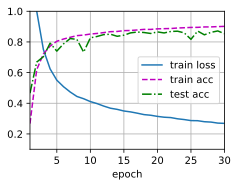

In [44]:

train_ch3(net,train_iter,test_iter,loss,trainer,num_epochs,batch_size,lr,)

----
改变参数/增加隐藏层 试一下

- 连续执行两次num_epochs=10训练的测试准确率 多数时候略高于 执行一次num_epochs=20的测试准确率.  
猜测: 我这里train_iter和test_iter的生成与train_ch3在一个单元格,执行两次num_epochs=10的时候对抽样的小批量进行了不同的抽法,类似于增加了"多样性"?

but就算我把训练/测试集的生成和训练分开,即训练/测试集不变,5*2也要比10好一点

- 层数变多,模型就变得复杂,需要训练的轮数就会增加.  
也只有训练轮数多了之后复杂模型的优势才能表现出来  
~~暂时还没见到过拟合~~

- 即使超参数相同,波动很大

- 随训练轮数的增多,test_acc的曲线逐渐变平滑,基本没有突增突减

- 训练了540轮,~~仍未见过拟合~~.此时train_acc已经极接近1,train_loss极接近0,应该是已经无法训练了,只有有loss才能优化<br><br>
这也可以解释为什么训练轮数多了曲线变得平滑.  因为后面loss很小,所以每一轮训练后参数的变化也小,所以曲线平滑

事实上已经发生了过拟合,第30轮时,`train_acc=0.90` `test_acc`=0.88`; 第540轮时,`train_acc=0.996`,`test_acc=0.89`  
这里train_acc从0.90上升到0.996,说明模型已经学到了不该学的东西,只不过可能这些噪声对结果无害甚至略有益处,所以test_acc略微有上升

过拟合不一定表现为测试性能下降. 训练性能持续提升,测试性能停滞不前,两者差距不断扩大就已经是过拟合 [4.4.3]

----

## 4.4 模型选择,欠拟合,过拟合

### 4.4.1 训练误差和泛化误差

#### 1.独立同分布假设

现实中总会涉及一些违背独立同分布假设的情况,不过有些轻微违背并无影响.  
而另一些则会面临一些问题(见后文)

#### 2.模型复杂性

一个经验法则:能够轻松解释任意事实的模型是复杂的,而表达力有限但仍能很好地解释数据的模型可能更有实际用途

本节为了给出一些直观的印象，我们将重点介绍几个倾向于影响模型泛化的因素。
1. **可调整参数的数量**。当可调整参数的数量（有时称为自由度）很大时，模型往往更容易过拟合。
2. **参数采用的值**。当权重的取值范围较大时，模型可能更容易过拟合。
3. **训练样本的数量**。即使模型很简单，也很容易过拟合只包含一两个样本的数据集。而过拟合一个有数百万个样本的数据集则需要一个极其灵活的模型。

总的来说,模型越复杂,就越容易过拟合.&ensp;&ensp;很简单,因为<mark>复杂模型学习能力太强,会学到一些不该学的抽取的样本中的特殊信息</mark>

### 4.4.2 模型选择

1. 划分验证集
2. K折交叉验证

### 4.4.3 欠拟合&过拟合

- 欠拟合: 训练误差和验证误差之间只有一点差距,但是都很大  
模型不能减小训练误差,说明模型表达能力不足
- 过拟合: 训练误差明显小于验证误差  
过拟合并不总是一件坏事,因为我们关注的是验证误差

过拟合和欠拟合主要取决于模型复杂性和训练数据集的大小
#### 1.模型复杂性

对单个特征x和对应标签y组成的数据集, 以线性模型为例,多项式阶数越高,模型越复杂,也越容易过拟合.  
事实上,函数阶数等于数据样本数的多项式函数可以完美拟合数据集 [~~有机会了尝试实现一下~~|书中后文就是]

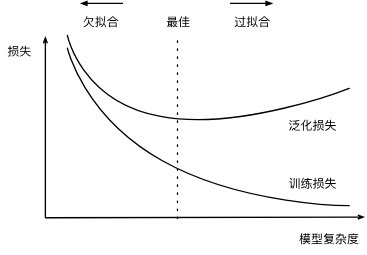

#### 2.数据集大小

- 训练数据集中的样本数越小,越可能(而且更严重地)过拟合
- 随训练数据量的增加,泛化误差通常会减少
- 对于固定的任务和数据分布,模型复杂度和数据集大小之间通常存在一定的关系:
    - 对更大的数据集, 我们就可能尝试拟合一个更复杂的模型
    - 如果没有足够的数据量,简单的模型可能更有用

### 4.4.4 多项式回归

我们可以通过多项式拟合来探索这些概念

In [1]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

#### 1.生成数据集

给定x,我们使用以下三阶多项式来生成数据:$$y = 5 + 1.2x - 3.4\frac{x^2}{2!} + 5.6 \frac{x^3}{3!} + \epsilon \text{ where } \epsilon \sim \mathcal{N}(0, 0.1^2).$$
这里将平常的多项式中的$x^i$ 调整为$\frac{x^i}{i!}$,是因为在优化过程中我们通常希望避免非常大的数(梯度/损失值)

In [114]:
#为训练集和测试集各生成100个样本
rng=np.random.default_rng(3)

max_degree=20 #max degree
n_train,n_test=100,100 #size of train data and test data
true_w=np.zeros(max_degree)
true_w[0:4]=np.array([5,1.2,-3.4,5.6])

features=rng.normal(size=(n_train+n_test,1))
rng.shuffle(features)
poly_features=np.power(features,np.arange(max_degree).reshape(1,-1))  # return 200*20
for i in range(max_degree):
    poly_features[:,i]/=math.gamma(i+1)  #gamma(i+1)=i!

labels=np.dot(poly_features,true_w)  #200*20 @ 20 -->200
labels+=rng.normal(scale=0.1,size=labels.shape)

In [115]:
#NumPyndarray-->tensor
true_w,features,poly_features,labels=[torch.tensor(x,dtype=torch.float32)
                                      for x in [true_w,features,poly_features,labels]]


In [116]:
labels.shape

torch.Size([200])

In [117]:
features[:2],poly_features[:2],labels[:2]

(tensor([[ 0.1342],
         [-0.9259]]),
 tensor([[ 1.0000e+00,  1.3424e-01,  9.0102e-03,  4.0318e-04,  1.3531e-05,
           3.6327e-07,  8.1275e-09,  1.5586e-10,  2.6154e-12,  3.9010e-14,
           5.2367e-16,  6.3906e-18,  7.1490e-20,  7.3821e-22,  7.0784e-24,
           6.3347e-26,  5.3148e-28,  4.1968e-30,  3.1299e-32,  2.2114e-34],
         [ 1.0000e+00, -9.2590e-01,  4.2865e-01, -1.3229e-01,  3.0623e-02,
          -5.6707e-03,  8.7509e-04, -1.1575e-04,  1.3396e-05, -1.3782e-06,
           1.2761e-07, -1.0741e-08,  8.2876e-10, -5.9027e-11,  3.9038e-12,
          -2.4097e-13,  1.3944e-14, -7.5948e-16,  3.9067e-17, -1.9038e-18]]),
 tensor([5.2813, 1.6257]))

#### 2.对模型进行训练和测试

In [103]:
#evaluate loss
def evaluate_loss(net,data_iter,loss):
    '''
    evaluate the loss of the module
    '''
    metric=d2l.Accumulator(2) #用于计算指定数量的变量的累计和
    for X,y in data_iter:
        out=net(X)
        y=y.reshape(out.shape)
        l=loss(out,y)
        metric.add(l.sum(),l.numel()) #torch.numel()获取输入张量内的元素个数
    return metric[0]/metric[1]
    

----
```python
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator.

    Defined in :numref:`sec_utils`"""
    dataset = torch.utils.data.TensorDataset(*data_arrays)
    return torch.utils.data.DataLoader(dataset, batch_size, shuffle=is_train)
```
- 函数内部首先使用`torch.utils.data.TensorDataset`来创建一个数据集（dataset），它接收多个张量作为参数，并假设这些张量第一个维度是样本维度.  
*这里通过`*data_arrays`拆包传入多个张量*  
- 然后，使用`torch.utils.data.DataLoader`来创建一个数据加载器（data loader），它负责从数据集中按批次加载数据，并可以设置是否打乱数据。
    - 训练阶段: is_train=True，数据会被打乱
    - 验证/测试阶段: is_train=False，数据保持原顺序
---- 

In [124]:
# define function of train
def train(train_features,test_features,train_labels,test_labels,num_epochs=500):
    loss=nn.MSELoss(reduction='none')
    input_shape=train_features.shape[-1]
    net=nn.Sequential(nn.Linear(input_shape,1,bias=False)) #多项式函数中已经包括了偏置
    
    batch_size=min(10,train_labels.shape[0])
    train_iter=d2l.load_array((train_features,train_labels.reshape(-1,1)),batch_size) ##
    test_iter=d2l.load_array((test_features,test_labels.reshape(-1,1)),batch_size,is_train=False)

    trainer=torch.optim.SGD(net.parameters(),lr=0.01)
    animator=d2l.Animator(xlabel='epoch',ylabel='loss',yscale='log',
                          xlim=[1,num_epochs],ylim=[1e-3,1e2],
                          legend=['train','test'])

    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net,train_iter,loss,trainer)
        if epoch==0 or (epoch+1)%20==0:
            animator.add(epoch+1,(evaluate_loss(net,train_iter,loss),
                                  evaluate_loss(net,test_iter,loss)))
    print('weight:',net[0].weight.data.numpy())

#### 3.三阶多项式函数拟合(正常)

weight: [[ 5.0080347  1.2045202 -3.3846407  5.6102524]]


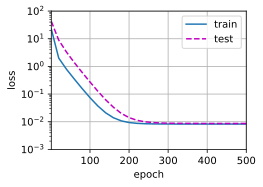

In [121]:
#choose the first four dimensions
train(poly_features[:n_train,:4],poly_features[n_test:,:4],
      labels[:n_train],labels[n_test:])

结果很接近真实值`[5,1.2,-3.4,5.6]`

#### 4.线性函数拟合(欠拟合)

weight: [[3.7510176 3.5236855]]


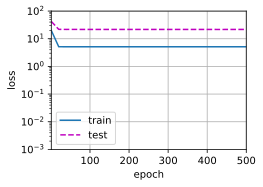

In [122]:
#just choose the first two dimentions
train(poly_features[:n_train,:2],poly_features[n_test:,:2],
      labels[:n_train],labels[n_test:])

可以看到损失始终很大,降不下去.

#### 5.高阶多项式函数(过拟合)

weight: [[ 4.9931903   1.3244957  -3.2716374   5.0740175  -0.4479785   1.2374517
   0.09091494  0.37271068  0.29100993 -0.1894829  -0.06473251  0.18881345]]


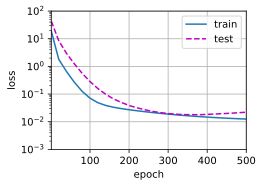

In [123]:
train(poly_features[:n_train,:12],poly_features[n_test:,:12],
      labels[:n_train],labels[n_test:])

weight: [[ 4.9878459e+00  1.3360277e+00 -3.2400084e+00  4.9916463e+00
  -5.3740340e-01  1.5529000e+00 -1.5825672e-02  3.7569669e-01
  -3.4879774e-02 -1.5075113e-01  1.4264286e-01 -2.4808228e-02
  -1.2184107e-01 -1.6939607e-01 -1.3473447e-01  8.3885849e-02
  -5.7705689e-02  1.6800394e-02  3.3886808e-03 -1.4214891e-01]]


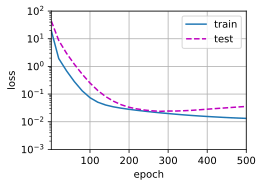

In [120]:
train(poly_features[:n_train,:],poly_features[n_test:,:],
      labels[:n_train],labels[n_test:])

----
<div style="background: #f6dcce; border-left: 5px solid #ed5126; padding: 10px; margin: 10px 0;">
<strong>ATTENTION</strong><br>
注:<br>
1. 具体的train和test的loss的<strong>绝对接近程度</strong>(即图像上这两条线之间的距离) 受第一步生成数据的随机情况影响很大<br>
2. 有时候test的loss不会上升,这里找到了一组仅12阶就发生test上升的数据<br>
3. 训练轮数多了过拟合概率很大
</div>
